In [ ]:
%matplotlib inline

loaded labels


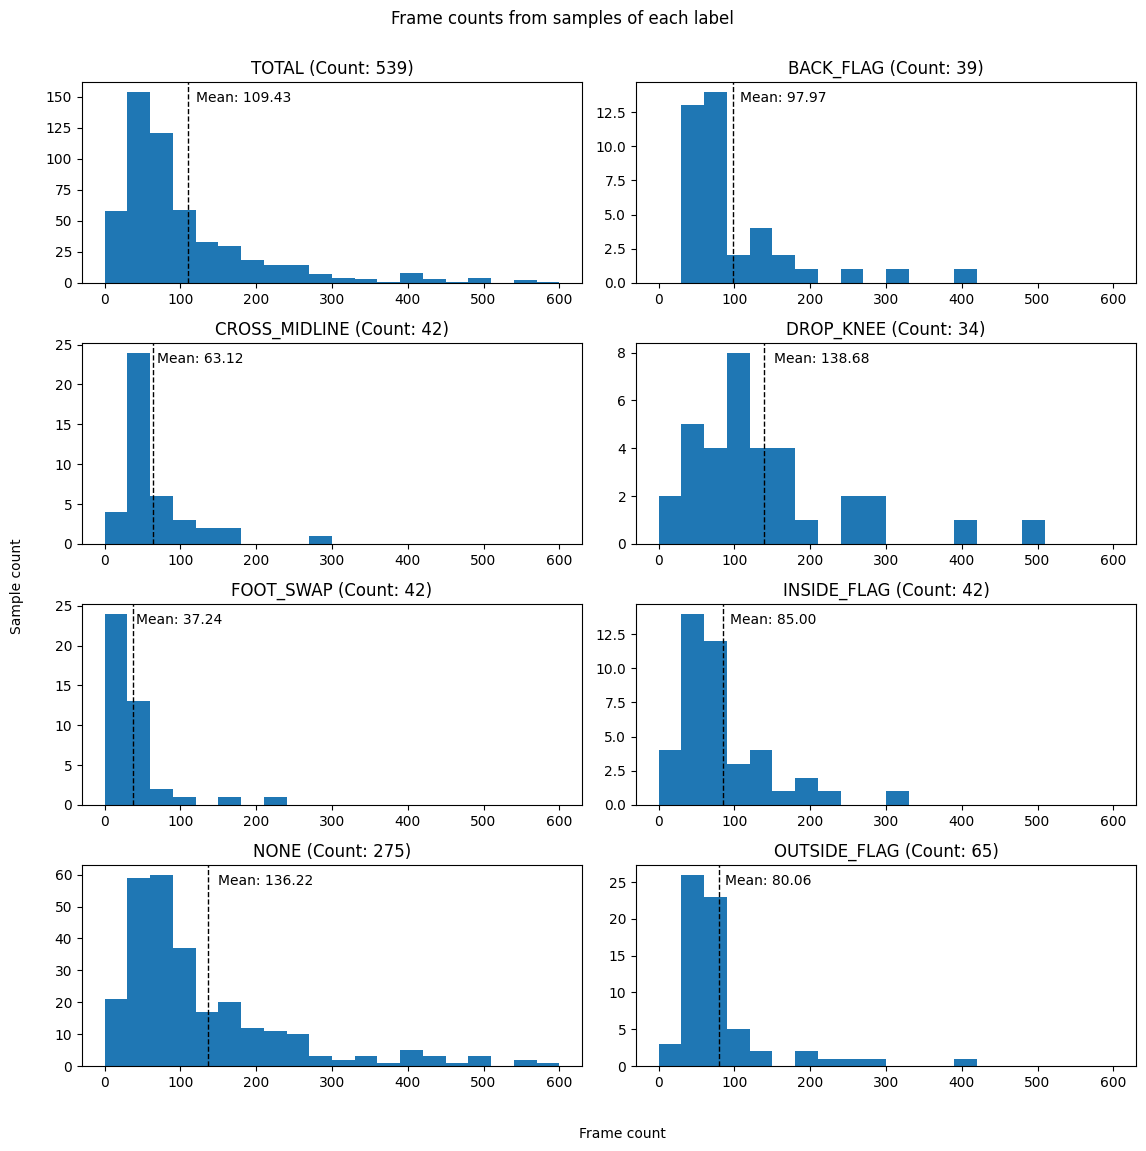

In [1]:
from src.sampling.images import plot_frame_count_distributions

samples_root_dir = "data/samples"

plot_frame_count_distributions(samples_root_dir)

# SOTA

In [ ]:
from src.common.model import TestArgs
from src.sota.model import SOTA, SOTAModelInitializeArgs, SOTAConstructorArgs,\
    SOTAMultiRunTrainArgs, SOTATrainArgs
from src.sota.kfold import SOTAFoldCrossValidation

## Model Selection

In [ ]:
# yolo11n-cls
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-kf", 
        model_arch="yolo11n-cls"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=5,
        train_args=SOTATrainArgs(epochs=10, balanced=True)
    )
)

cross_validation.train_folds()

In [ ]:
# yolo11n unbalanced
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-unbalanced-kf", 
        model_arch="yolo11n-cls"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=5,
        train_args=SOTATrainArgs(epochs=10, balanced=False)
    )
)

cross_validation.train_folds()

In [ ]:
# yolo11n-cls, on full dataset
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-full-kf", 
        model_arch="yolo11n-cls",
        dataset_name="techniques_full"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=5,
        train_args=SOTATrainArgs(epochs=10, balanced=True)
    )
)

cross_validation.train_folds()

In [ ]:
# yolo11n unbalanced, with full dataset
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-unbalanced-full-kf", 
        model_arch="yolo11n-cls",
        dataset_name="techniques_full"),
    train_run_args = SOTAMultiRunTrainArgs(
        runs=5,
        train_args=SOTATrainArgs(epochs=10, balanced=False)
    )
)

cross_validation.train_folds()

## Fold Testing (on full)

In [ ]:
# yolo11n-cls
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-kf", 
        model_arch="yolo11n-cls")
)

cross_validation.test_folds_on_full()

In [ ]:
# yolo11n unbalanced
cross_validation = SOTAFoldCrossValidation(
    model_args = SOTAConstructorArgs(
        name="yolo11n-unbalanced-kf", 
        model_arch="yolo11n-cls")
)

cross_validation.test_folds_on_full()

## Augmentations

In [ ]:
from torchvision.transforms import Compose, ColorJitter, RandomHorizontalFlip
from PIL import Image

from src.sota.augmentation import demo_augmentation

In [ ]:
image_path = "data/hpe/img/test/images/pexels-allan-mas-5383472_jpg.rf.a667a61c7880e511bd5d9c9c92a16cd4.jpg"

original = Image.open(image_path)
original.reduce(10).show()
original.save("data/aug/Original.jpg")

In [ ]:
aug = Compose([
    RandomHorizontalFlip(p=1)
])
save_path = "data/aug/Flipped.jpg"
demo_augmentation(original, aug, save_path)

In [ ]:
aug = Compose([
    ColorJitter(brightness=(1.4, 1.4))
])
save_path = "data/aug/Brightness.jpg"
demo_augmentation(original, aug, save_path)

In [ ]:
aug = Compose([
    ColorJitter(contrast=(1.4, 1.4))
])
save_path = "data/aug/Contrast.jpg"
demo_augmentation(original, aug, save_path)

In [ ]:
aug = Compose([
    ColorJitter(saturation=(1.4, 1.4))
])
save_path = "data/aug/Saturation.jpg"
demo_augmentation(original, aug, save_path)

In [ ]:
aug = Compose([
    ColorJitter(hue=(0.05, 0.05))
])
save_path = "data/aug/Hue.jpg"
demo_augmentation(original, aug, save_path)

# HPE DNN

In [ ]:
%matplotlib inline

from src.hpe_dnn.architecture import DnnArch
from src.hpe_dnn.model import HpeDnnModelInitializeArgs, HpeDnnMultiRunTrainArgs, HpeDnnTrainArgs,\
    HpeDnnConstructorArgs
from src.hpe_dnn.kfold import HpeDnnFoldCrossValidation

## Model Selection

In [ ]:
# DNN arch 1
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 1, no balancing
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-kf",
        model_arch=DnnArch.ARCH1, 
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 1, no balancing, no augmentation
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-no-aug-kf", 
        model_arch=DnnArch.ARCH1, 
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=False)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 1, higher dropout rate
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-dr0.3-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(
            dropout_rate=0.3
        ),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 1 on full dataset
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-full-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
#DNN arch 1 on full dataset, no balancing
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-full-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
#DNN arch 1 on full dataset, no balancing, no augmentation
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-no-aug-full-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2, on full
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-full-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2, no balancing
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2, no balancing, on full
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-full-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2, no balancing, no augmentation
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-no-aug-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=False)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 2, no balancing, no augmentation, on full
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-no-aug-full-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques_full"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=False, augment=False)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 3
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch3-kf", 
        model_arch=DnnArch.ARCH3,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 4
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch4-kf", 
        model_arch=DnnArch.ARCH4,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

In [ ]:
# DNN arch 5
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch5-kf", 
        model_arch=DnnArch.ARCH5,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=5,
        train_args=HpeDnnTrainArgs(epochs=10, balanced=True, augment=True)
    ))

cross_validation.train_folds()

## Fold Testing (on full)

In [ ]:
# DNN arch 1
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0)))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 1, no balancing
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-kf", 
        model_arch=DnnArch.ARCH1, 
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=False, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 1, no balancing, no augmentation
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-no-bal-no-aug-kf", 
        model_arch=DnnArch.ARCH1, 
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=False, augment=False)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 1, higher dropout rate
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch1-dr0.3-kf", 
        model_arch=DnnArch.ARCH1,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(
            dropout_rate=0.3
        ),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=True, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 2
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=True, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 2, no balancing
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=False, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 2, no balancing, no augmentation
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch2-no-bal-no-aug-kf", 
        model_arch=DnnArch.ARCH2,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=False, augment=False)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 3
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch3-kf", 
        model_arch=DnnArch.ARCH3,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=True, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 4
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch4-kf", 
        model_arch=DnnArch.ARCH4,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=True, augment=True)
    ))

cross_validation.test_folds_on_full()

In [ ]:
# DNN arch 5
cross_validation = HpeDnnFoldCrossValidation(
    model_args=HpeDnnConstructorArgs(
        name="arch5-kf", 
        model_arch=DnnArch.ARCH5,
        dataset_name="techniques"),
    train_run_args=HpeDnnMultiRunTrainArgs(
        model_initialize_args=HpeDnnModelInitializeArgs(),
        runs=0,
        train_args=HpeDnnTrainArgs(epochs=0, balanced=True, augment=True)
    ))

cross_validation.test_folds_on_full()

## Augmentations

In [ ]:
from albumentations import HorizontalFlip, ShiftScaleRotate, Perspective, Compose

from src.common.helpers import imread
from src.common.draw import BLUE
from src.hpe.common.typing import KeypointDrawConfig
from src.hpe.mp.model import build_holistic_model
from src.hpe.mp.evaluate import predict_landmarks
from src.hpe.mp.draw import draw_my_landmarks
from src.hpe_dnn.augmentation import demo_augmentation

In [ ]:
image_path="data/hpe/img/test/images/pexels-cottonbro-6700275_jpg.rf.794e68fbc6c04d5e151c099b0ef212d7.jpg"

original = imread(image_path)
with build_holistic_model() as model:
    landmarks = predict_landmarks(original, model)

config = KeypointDrawConfig(relative_size=0.0003, relative_thickness=1, right_color=BLUE)
original_hpe = draw_my_landmarks(original, landmarks, config=config)

demo_augmentation(original=original_hpe, augmentation=Compose([]), save_path="data/aug/OriginalHPE.jpg")

In [ ]:
aug = Compose([
    HorizontalFlip(p=1)
])
save_path = "data/aug/FlippedHPE.jpg"
demo_augmentation(original=original_hpe, augmentation=aug, save_path=save_path)

In [ ]:
aug = Compose([
    ShiftScaleRotate(shift_limit=(0.1, 0.1), scale_limit=0, rotate_limit=0, p=1)
])
save_path = "data/aug/ShiftedHPE.jpg"
demo_augmentation(original=original_hpe, augmentation=aug, save_path=save_path)

In [ ]:
aug = Compose([
    ShiftScaleRotate(shift_limit=0, scale_limit=(0.1, 0.1), rotate_limit=0, p=1)
])
save_path = "data/aug/ScaledHPE.jpg"
demo_augmentation(original=original_hpe, augmentation=aug, save_path=save_path)

In [ ]:
aug = Compose([
    Perspective(scale=(0.1, 0.1), p=1)
])
save_path = "data/aug/PerspectiveHPE.jpg"
demo_augmentation(original=original_hpe, augmentation=aug, save_path=save_path)

# Real usecase evaluation 

In [ ]:
from glob import glob

from src.labels import get_labels_from_video, find_valid_segments
from src.common.evaluate import print_results

from src.sota.model import SOTA, SOTAConstructorArgs, SOTAModelInitializeArgs
from src.sota.evaluate import collect_evaluation_performance as collect_sota
from src.sota.play import play_with_label_and_prediction as play_sota

from src.hpe_dnn.model import HpeDnn, HpeDnnConstructorArgs, HpeDnnModelInitializeArgs
from src.hpe_dnn.architecture import DnnArch
from src.hpe_dnn.evaluate import collect_evaluation_performance as collect_hpednn
from src.hpe_dnn.play import play_with_label_and_prediction as play_hpednn

In [ ]:
# Best performing SOTA model
sota_model = SOTA(args=SOTAConstructorArgs(name="yolo11n-unbalanced-full-kf-fold1",
    model_arch="yolo11n-cls", dataset_name="techniques_full"))
sota_model.initialize_model(args=SOTAModelInitializeArgs())

In [ ]:
# Best performing DNN model
dnn_model = HpeDnn(args=HpeDnnConstructorArgs(name="arch2-no-bal-no-aug-full-kf-fold2", 
    model_arch=DnnArch.ARCH2, dataset_name="techniques_full"))
dnn_model.initialize_model(args=HpeDnnModelInitializeArgs())

In [ ]:
# Generate evaluation result files
video_paths = glob("data/videos/**/*.*", recursive=True)

for video_path in video_paths:
    collect_sota(video_path, sota_model)

In [ ]:
for video_path in video_paths:
    collect_hpednn(video_path, dnn_model)

## Play with concurrent technique prediction

In [ ]:
video_path = "data/videos/Route9Climb1.mp4"
label_path = get_labels_from_video(video_path)
valids = find_valid_segments(label_path)
segment_idx = 0

In [ ]:
play_sota(video_path, sota_model, valids[segment_idx][0], valids[segment_idx][1])

In [ ]:
play_hpednn(video_path, dnn_model, valids[segment_idx][0], valids[segment_idx][1])

# Statistics

In [ ]:
from numpy import mean
from scipy.stats import shapiro, ttest_ind

from src.sota.kfold import SOTAFoldCrossValidation
from src.hpe_dnn.kfold import HpeDnnFoldCrossValidation

In [ ]:
sota = SOTAFoldCrossValidation.evaluation_instance("yolo11n-unbalanced-full-kf", "yolo11n-cls")
dnn = HpeDnnFoldCrossValidation.evaluation_instance("arch2-no-bal-no-aug-full-kf")

sota_test_arr = sota.get_test_accuracy_metrics()
dnn_test_arr = dnn.get_test_accuracy_metrics()

In [ ]:
print(f"SOTA test accuracies are normally distributed?: {shapiro(sota_test_arr)}")
print(f"DNN test accuracies are normally distributed?: {shapiro(dnn_test_arr)}")

In [ ]:
# t test for normally distributed data
print(f"Ho: Both test results have indentical averages?: {ttest_ind(sota_test_arr, dnn_test_arr, alternative="greater")}")
print(f"Average test accuracy of SOTA yolo11n-unbalanced-full models ({mean(sota_test_arr):.1%}) is " +
      f"significantly greater than that of DNN arch2-no-bal-no-aug-full models ({mean(dnn_test_arr):.1%})")

# Comparison

In [ ]:
from src.hpe_dnn.kfold import HpeDnnFoldCrossValidation
from src.sota.kfold import SOTAFoldCrossValidation
from src.common.plot import box_plot_accuracies
from src.common.evaluate import print_all_results

In [ ]:
box_plot_accuracies(kfold_models=[
        HpeDnnFoldCrossValidation.evaluation_instance("arch2-no-bal-no-aug-full-kf"),
        SOTAFoldCrossValidation.evaluation_instance("yolo11n-unbalanced-full-kf", "yolo11n-cls")
    ],
    save_path="data/runs/TestComparisonBestModelTypes.png"
)

In [ ]:
box_plot_accuracies(kfold_models=[
        HpeDnnFoldCrossValidation.evaluation_instance("arch1-full-kf"),
        HpeDnnFoldCrossValidation.evaluation_instance("arch1-no-bal-full-kf"),
        HpeDnnFoldCrossValidation.evaluation_instance("arch2-full-kf"), 
        HpeDnnFoldCrossValidation.evaluation_instance("arch2-no-bal-full-kf")
    ],
    save_path="data/runs/TestComparisonForBalancedOnFull.png"
)

In [ ]:
print_all_results("data/df/evaluation_results")